In [108]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def get_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [110]:
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    return data

In [111]:
def crossover_signals(data):
    buy_signals = [None] * len(data)
    sell_signals = [None] * len(data)
    position = False #False means no position, True means long position

    for i in range (len(data)):
        if data['Short_MA'].iloc[i] > data['Long_MA'].iloc[i] and not position:
            buy_signals[i] = data['Close'].iloc[i]
            position = True #bought position
        elif data['Short_MA'].iloc[i] < data['Long_MA'].iloc[i] and position:
            sell_signals[i] = data['Close'].iloc[i]
            position = False #sold position
        
    return buy_signals, sell_signals

In [112]:
def plot_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label='Close Price', alpha=0.35)
    plt.plot(data['Short_MA'], label=f'Short {short_window}-Day MA', alpha=0.75)
    plt.plot(data['Long_MA'], label=f'Long {long_window}-Day MA', alpha=0.75)
    
    plt.scatter(data.index, data['Buy'], label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(data.index, data['Sell'], label='Sell Signal', marker='v', color='red', alpha=1)
    
    plt.title(f'Moving Average Crossover Strategy for {symbol}')
    plt.legend(loc='best')
    plt.show()

In [113]:
def calculate_net_result(data):
    data['Daily Return'] = data['Close'].pct_change()
    data['Strategy Return'] = data['Daily Return'].where(data['Buy'].notnull(), 0)
    cumulative_return = (1 + data['Strategy Return']).cumprod().iloc[-1] - 1
    if cumulative_return > 0:
        return "Net Up"
    else:
        return "Net Down"

In [114]:
def run_strategy(symbol, start_date, end_date, short_window, long_window):
    data = get_data(symbol, start_date, end_date)
    data = calculate_moving_averages(data, short_window, long_window)
    data['Buy'], data['Sell'] = crossover_signals(data)
    plot_data(data)
    result = calculate_net_result(data)
    return result

[*********************100%***********************]  1 of 1 completed


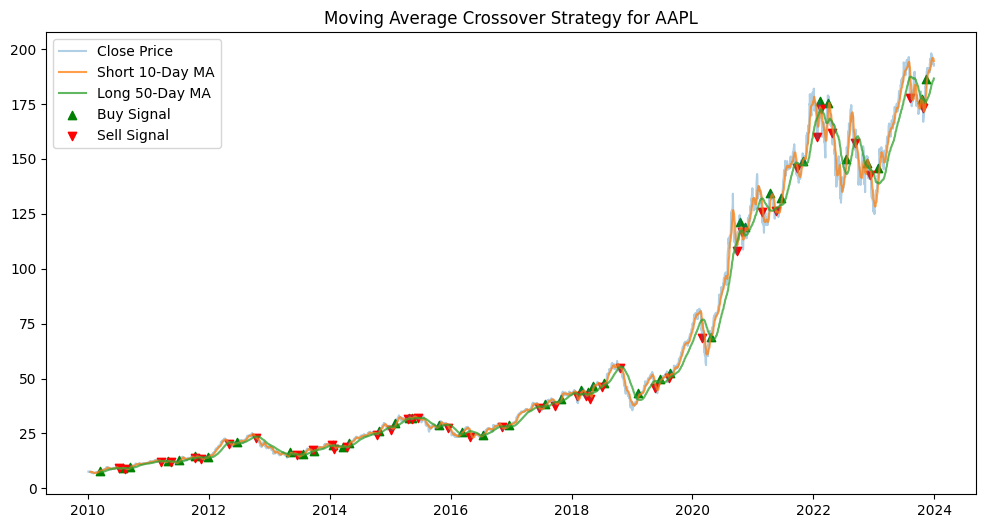

Net Up


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_9376\919651201.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (1 + data['Strategy Return']).cumprod()[-1] - 1


In [115]:
if __name__ == "__main__":
    # User-defined parameters
    symbol = 'AAPL'  # Stock ticker symbol
    start_date = '2010-01-01'
    end_date = '2024-01-01'
    short_window = 10  # Short-term moving average window
    long_window = 50   # Long-term moving average window

    # Step 1: Fetch data
    data = get_data(symbol, start_date, end_date)
    
    # Step 2: Calculate moving averages
    data = calculate_moving_averages(data, short_window, long_window)
    
    # Step 3: Generate buy/sell signals
    data['Buy'], data['Sell'] = crossover_signals(data)
    
    # Step 4: Plot the data with buy/sell signals
    plot_data(data)

    # Step 5: Calculate net result
    result = calculate_net_result(data)
    print(result)